In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def plot_series(time,series,format="-"):
    plt.figure(figsize=(10,6))
    plt.plot(time,series,format)
    plt.xlabel("time")
    plt.ylabel("value")
    plt.grid(True)

In [5]:
def trend(time,slope=0):
    return slope*time

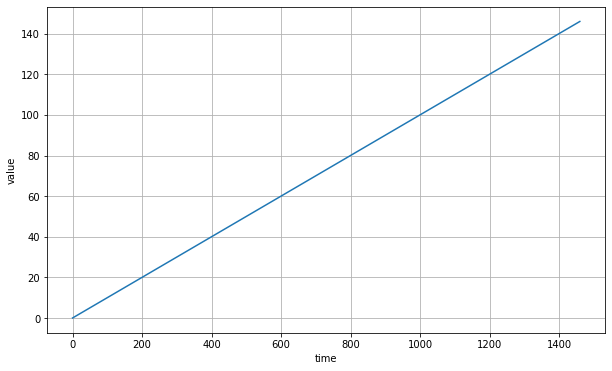

In [6]:
time=np.arange(4*365+1)
baseline=10
series=trend(time,0.1)
plot_series(time,series)
plt.show()

In [7]:
def seasonal_pattern(season_time):
    return np.where(season_time<0.4,
                    np.cos(season_time*2*np.pi),
                    1/np.exp(3*season_time))

def seasonality(time,period,amplitude=1,phase=0):
    season_time=((time+phase)%period)/period
    return amplitude*seasonal_pattern(season_time)

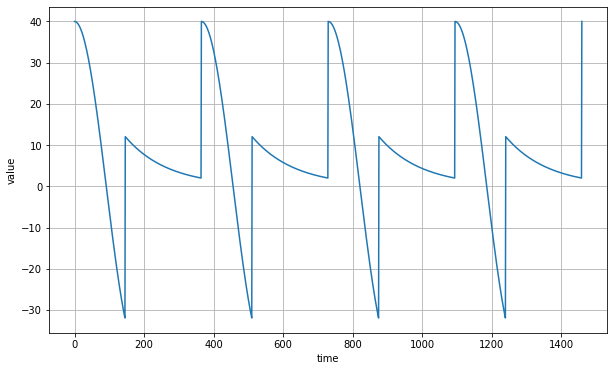

In [10]:
# seasonal value

baseline=10
amplitude=40
series=seasonality(time,period=365,amplitude=amplitude)
plot_series(time,series)
plt.show()

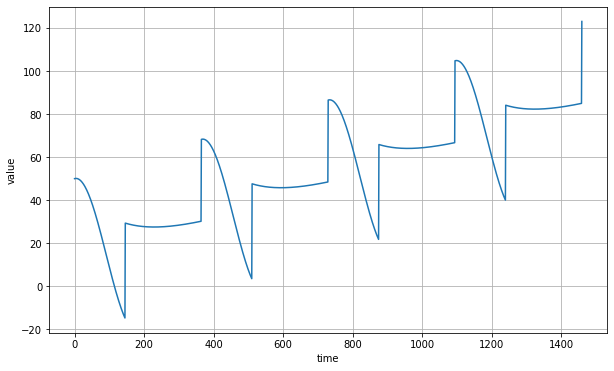

In [14]:
# seasonal data following the pattern increases over time

slope=0.05
series=baseline+trend(time,slope)+seasonality(time,period=365,amplitude=amplitude)
plot_series(time,series)
plt.show()

In [15]:
def noise(time,noise_level=1,seed=None):
    rnd=np.random.RandomState(seed)
    return rnd.randn(len(time))*noise_level

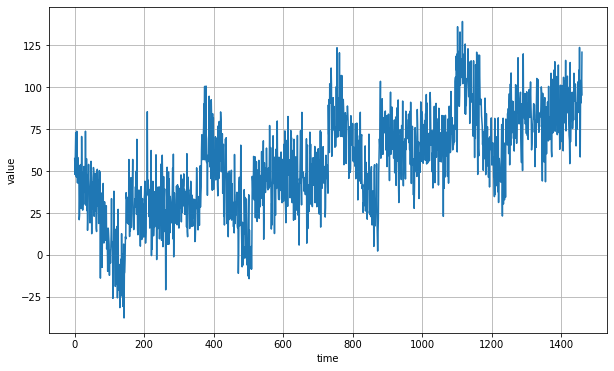

In [17]:
# noise series

noise_level=15
noisy_series=series+noise(time,noise_level,seed=42)
plot_series(time,noisy_series)
plt.show()

In [25]:
# 1

def autocorrelation(time, amplitude):
    rho1 = 0.5
    rho2 = -0.1
    ar = np.random.randn(len(time) + 50)
    ar[:50] = 100
    for step in range(50, len(time) + 50):
        ar[step] += rho1 * ar[step - 50]
        ar[step] += rho2 * ar[step - 33]
    return ar[50:] * amplitude

In [33]:
# 2

def autocorrelation(time, amplitude):
    rho = 0.8
    ar = np.random.randn(len(time) + 1)
    for step in range(1, len(time) + 1):
        ar[step] += rho * ar[step - 1]
    return ar[1:] * amplitude

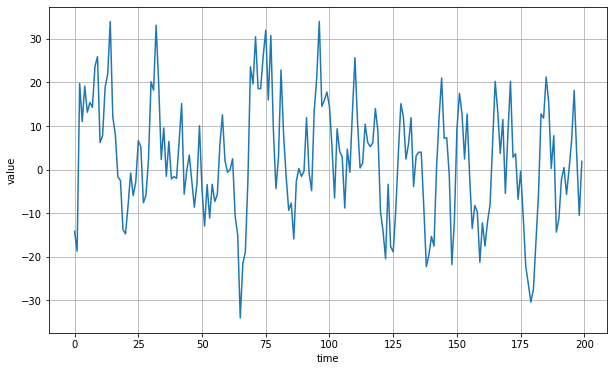

In [34]:
# autocorrelation

series = autocorrelation(time, 10)
plot_series(time[:200], series[:200])

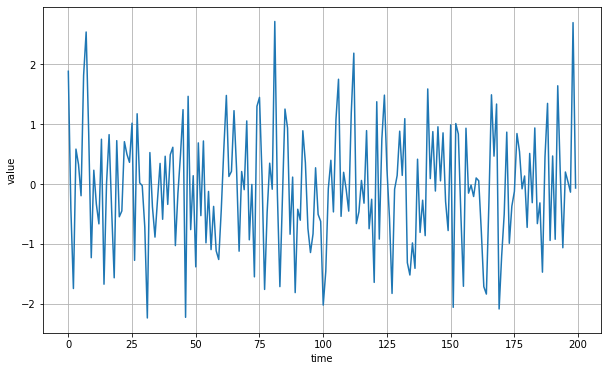

In [35]:
series = noise(time)
plot_series(time[:200], series[:200])

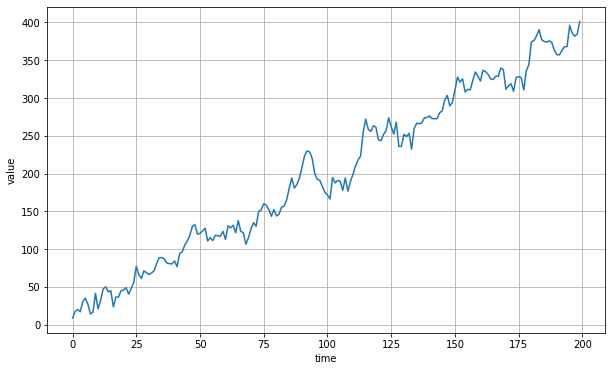

In [36]:
series = autocorrelation(time, 10) + trend(time, 2)
plot_series(time[:200], series[:200])

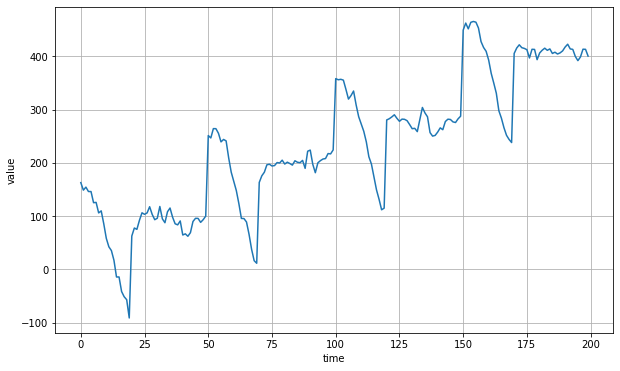

In [37]:
series = autocorrelation(time, 10) + seasonality(time, period=50, amplitude=150) + trend(time, 2)
plot_series(time[:200], series[:200])

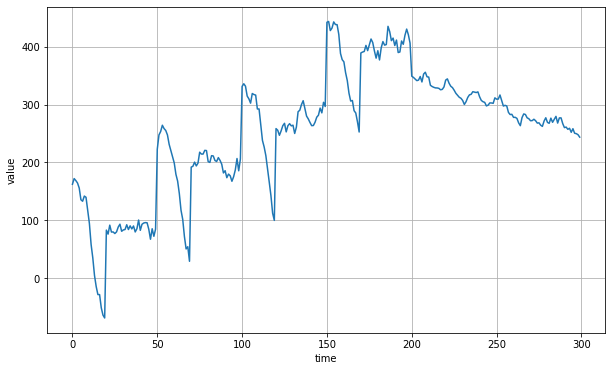

In [38]:
series = autocorrelation(time, 10) + seasonality(time, period=50, amplitude=150) + trend(time, 2)
series2 = autocorrelation(time, 5) + seasonality(time, period=50, amplitude=2) + trend(time, -1) + 550
series[200:] = series2[200:]
#series += noise(time, 30)
plot_series(time[:300], series[:300])